In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/shpppp/State_Shoreline.shp.xml
/kaggle/input/shpppp/State_Shoreline.dbf
/kaggle/input/shpppp/State_Shoreline.shp
/kaggle/input/shpppp/State_Shoreline.sbx
/kaggle/input/shpppp/State_Shoreline.cpg
/kaggle/input/shpppp/State_Shoreline.sbn
/kaggle/input/shpppp/State_Shoreline.prj
/kaggle/input/shpppp/State_Shoreline.shx
/kaggle/input/ny-taxi-dataset/Counties_Shoreline.shx
/kaggle/input/ny-taxi-dataset/New York City Taxi Fare Prediction.csv
/kaggle/input/ny-taxi-dataset/State_Shoreline.shx


# **Importing NY Dataset and Preprocessing**

In [2]:
df = pd.read_csv('/kaggle/input/ny-taxi-dataset/New York City Taxi Fare Prediction.csv')
df.head(5)

key          pickup_datetime  pickup_longitude  \
0  2015-01-27 13:08:24.0000002  2015-01-27 13:08:24 UTC        -73.973320   
1  2015-01-27 13:08:24.0000003  2015-01-27 13:08:24 UTC        -73.986862   
2  2011-10-08 11:53:44.0000002  2011-10-08 11:53:44 UTC        -73.982524   
3  2012-12-01 21:12:12.0000002  2012-12-01 21:12:12 UTC        -73.981160   
4  2012-12-01 21:12:12.0000003  2012-12-01 21:12:12 UTC        -73.966046   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.763805         -73.981430         40.743835                1  
1        40.719383         -73.998886         40.739201                1  
2        40.751260         -73.979654         40.746139                1  
3        40.767807         -73.990448         40.751635                1  
4        40.789775         -73.988565         40.744427                1

In [3]:
df.shape

(9914, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


In [5]:
duplicates = df[df.duplicated()]
print("Total duplicates in the entire DataFrame:", len(duplicates))

Total duplicates in the entire DataFrame: 0


In [6]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
print(missing_percentage)

Series([], dtype: float64)


The dataset shows no duplicate values or missing values

Variable key seems to provide no useful infromation to dataset

In [7]:
df = df.drop(columns='key')

In [8]:
df.describe()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count       9914.000000      9914.000000        9914.000000       9914.000000   
mean         -73.974722        40.751041         -73.973657         40.751743   
std            0.042774         0.033541           0.039072          0.035435   
min          -74.252193        40.573143         -74.263242         40.568973   
25%          -73.992501        40.736125         -73.991247         40.735254   
50%          -73.982326        40.753051         -73.980015         40.754065   
75%          -73.968013        40.767113         -73.964059         40.768757   
max          -72.986532        41.709555         -72.990963         41.696683   

       passenger_count  
count      9914.000000  
mean          1.671273  
std           1.278747  
min           1.000000  
25%           1.000000  
50%           1.000000  
75%           2.000000  
max           6.000000

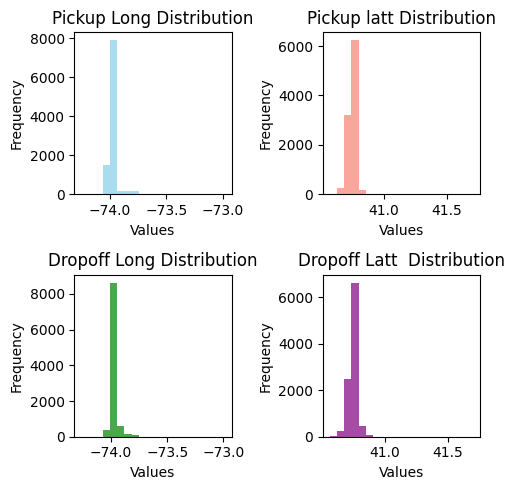

In [9]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and col1, col2, col3, col4 are the columns for distribution
col1 = df['pickup_longitude']
col2 = df['pickup_latitude']
col3 = df['dropoff_longitude']
col4 = df['dropoff_latitude']

fig, axs = plt.subplots(2, 2, figsize=(5, 5))  # 2 rows, 2 columns for the plots

# Plot the distribution curve for column 1
axs[0, 0].hist(col1, bins=20, color='skyblue', alpha=0.7)
axs[0, 0].set_title('Pickup Long Distribution')
axs[0, 0].set_xlabel('Values')
axs[0, 0].set_ylabel('Frequency')

# Plot the distribution curve for column 2
axs[0, 1].hist(col2, bins=20, color='salmon', alpha=0.7)
axs[0, 1].set_title('Pickup latt Distribution')
axs[0, 1].set_xlabel('Values')
axs[0, 1].set_ylabel('Frequency')

# Plot the distribution curve for column 3
axs[1, 0].hist(col3, bins=20, color='green', alpha=0.7)
axs[1, 0].set_title('Dropoff Long Distribution')
axs[1, 0].set_xlabel('Values')
axs[1, 0].set_ylabel('Frequency')

# Plot the distribution curve for column 4
axs[1, 1].hist(col4, bins=20, color='purple', alpha=0.7)
axs[1, 1].set_title('Dropoff Latt  Distribution')
axs[1, 1].set_xlabel('Values')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [10]:
coords_columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

for col in coords_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    # Define outlier boundaries
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Detect and print outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in column '{col}': {len(outliers)}")

Outliers in column 'pickup_longitude': 492
Outliers in column 'pickup_latitude': 329
Outliers in column 'dropoff_longitude': 545
Outliers in column 'dropoff_latitude': 471


Possible data errors or outliers available for further check

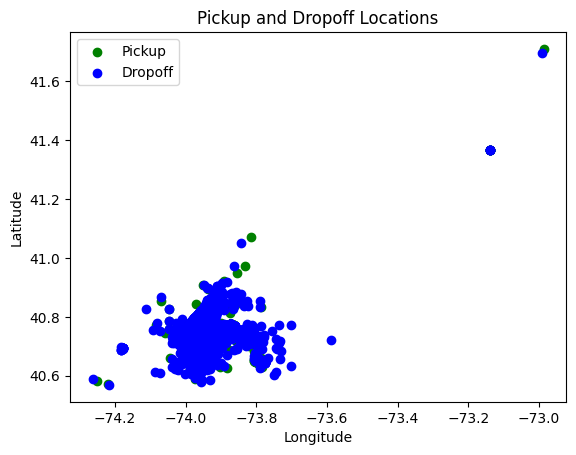

In [11]:
import matplotlib.pyplot as plt

# Extracting pickup and drop-off coordinates from the DataFrame
pickup_longitude = df['pickup_longitude']
pickup_latitude = df['pickup_latitude']
dropoff_longitude = df['dropoff_longitude']
dropoff_latitude = df['dropoff_latitude']

# Plotting pickup and drop-off points
plt.scatter(pickup_longitude, pickup_latitude, color='green', label='Pickup')
plt.scatter(dropoff_longitude, dropoff_latitude, color='blue', label='Dropoff')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup and Dropoff Locations')

# Show legend
plt.legend()

# Show the plot
plt.show()

# Mapping pickup cordinates

In [12]:
import folium
import random

# Assuming df is your DataFrame containing the pickup coordinates
pickup_samples = df.sample(n=1000)  # Select 1000 random rows

# Create a map centered around New York City or any specific location
map_center = [40.7128, -74.0060]  # New York City coordinates
m = folium.Map(location=map_center, zoom_start=10)

# Plot the pickup coordinates on the map (assuming columns are 'pickup_latitude' and 'pickup_longitude')
for index, row in pickup_samples.iterrows():
    lat = row['pickup_latitude']
    lon = row['pickup_longitude']
    marker = folium.Marker([lat, lon], icon=folium.Icon(color='green'), popup=f'Pickup {index}')
    marker.add_to(m)

# Save the map as an HTML file or display it in Jupyter Notebook
m.save('pickup_map.html')  # Save as HTML file
#m  # Display map in Jupyter Notebook

# Mapping dropoff cordinates

In [13]:
md = folium.Map(location=map_center, zoom_start=10)

# Plot the drop-off coordinates on the map (assuming columns are 'dropoff_latitude' and 'dropoff_longitude')
for index, row in pickup_samples.iterrows():
    latd = row['dropoff_latitude']
    lond = row['dropoff_longitude']
    marker = folium.Marker([latd, lond], icon=folium.Icon(color='blue'), popup=f'Dropoff {index}')
    marker.add_to(md)

# Save the map as an HTML file or display it in Jupyter Notebook
md.save('dropoff_map.html')  # Save as HTML file
#md

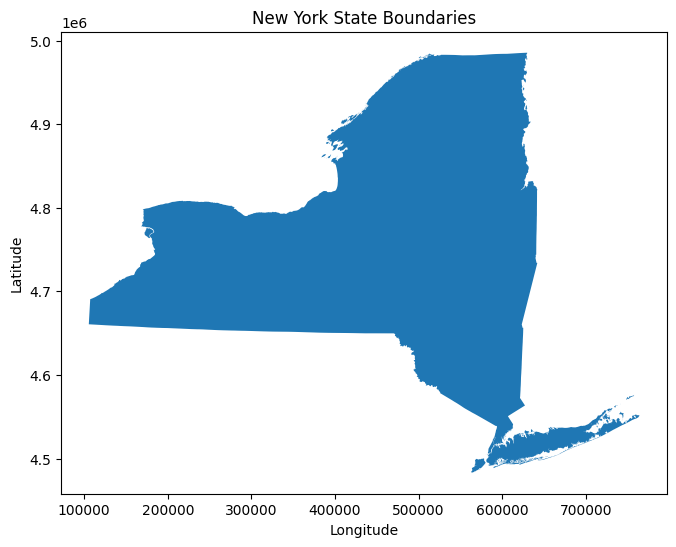

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to the shapefile containing New York State's boundaries
ny_shapefile_path = '/kaggle/input/shpppp/State_Shoreline.shx'  # Replace with your shapefile path

# Load the shapefile
ny_shape = gpd.read_file(ny_shapefile_path)

# Plot the shapefile
fig, ax = plt.subplots(figsize=(8, 6))
ny_shape.plot(ax=ax)
plt.title('New York State Boundaries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [15]:
# import geopandas as gpd
# import folium

# # Path to the shapefile containing New York State's boundaries
# ny_shapefile_path = '/kaggle/input/shpppp/State_Shoreline.shx'  

# # Load the shapefile
# ny_shape = gpd.read_file(ny_shapefile_path)

# map_center = [40.7128, -74.0060]
# m = folium.Map(location=map_center, zoom_start=7)

# folium.GeoJson(ny_shape).add_to(m)

# for idx, row in df.iterrows():
#     folium.Marker([row['pickup_latitude'], row['pickup_longitude']], popup=f'Pickup {idx}').add_to(m)
    
# # Save the map as an HTML file
# m.save('map_with_coordinates.html')

In [16]:
#m

In [17]:
print('Old size: %d' % len(df))


xlim = [-74.03, -73.77]
ylim = [40.63, 40.85]
df = df[(df.pickup_longitude> xlim[0]) & (df.pickup_longitude < xlim[1])]
df = df[(df.dropoff_longitude> xlim[0]) & (df.dropoff_longitude < xlim[1])]
df = df[(df.pickup_latitude> ylim[0]) & (df.pickup_latitude < ylim[1])]
df = df[(df.dropoff_latitude> ylim[0]) & (df.dropoff_latitude < ylim[1])]

print('New size: %d' % len(df))

Old size: 9914
New size: 9757


157 sum of pickup and drop off cordinates are outside newyork limits dropped

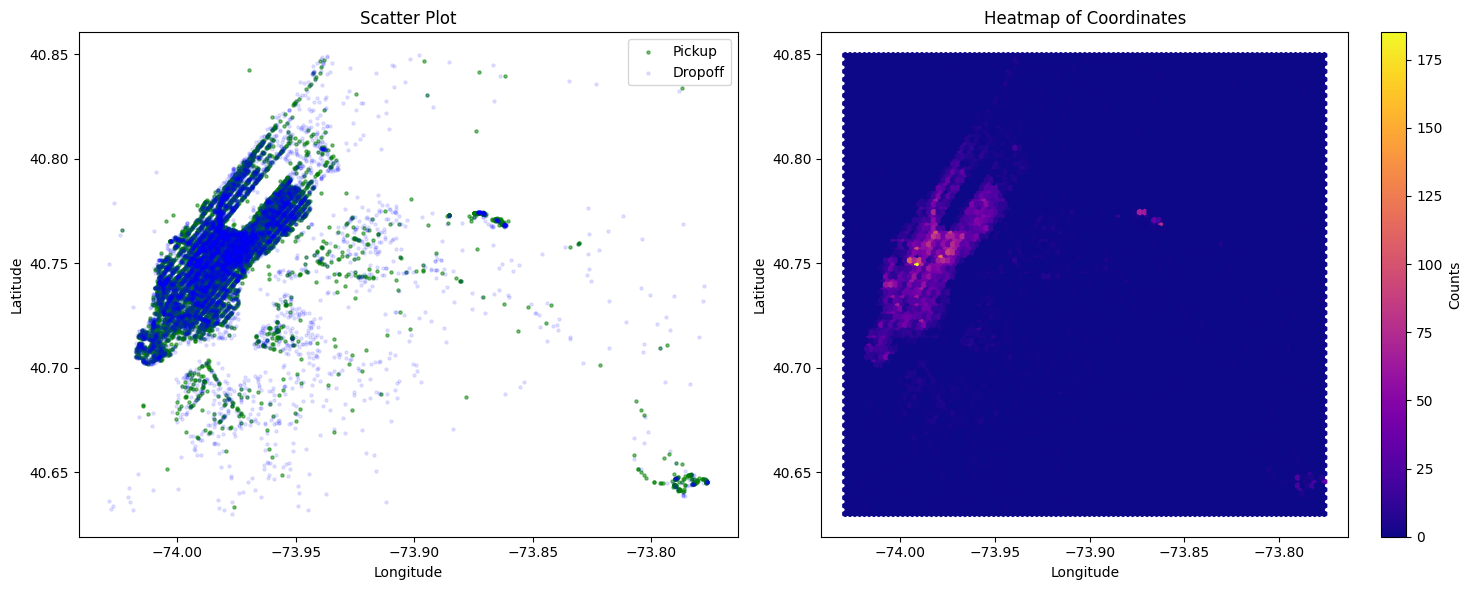

In [18]:
import matplotlib.pyplot as plt

# Separate pickup and dropoff coordinates
pickup_longitude = df['pickup_longitude']
pickup_latitude = df['pickup_latitude']
dropoff_longitude = df['dropoff_longitude']
dropoff_latitude = df['dropoff_latitude']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot with pickups in green and dropoffs in blue
ax1.scatter(pickup_longitude, pickup_latitude, c='green', alpha=0.5, label='Pickup', s=5)
ax1.scatter(dropoff_longitude, dropoff_latitude, c='blue', alpha=0.1, label='Dropoff', s=5)
ax1.set_title('Scatter Plot')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.legend()

# Heatmap-like plot using hexbin
hb = ax2.hexbin(pickup_longitude.tolist() + dropoff_longitude.tolist(),
                pickup_latitude.tolist() + dropoff_latitude.tolist(),
                gridsize=100, cmap='plasma')
ax2.set_title('Heatmap of Coordinates')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
plt.colorbar(hb, ax=ax2, label='Counts')

plt.tight_layout()
plt.show()


Converting Time variable

# Feature enginnering

In [19]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [20]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['name_of_week'] = df['pickup_datetime'].dt.strftime('%A')
df['hour'] = df['pickup_datetime'].dt.hour

In [21]:
print("Count of each year:")
print(df['year'].value_counts())


Count of each year:
year
2011    2024
2014    1875
2010    1713
2012    1410
2013    1122
2009    1006
2015     607
Name: count, dtype: int64


In [22]:
from math import radians, sin, cos, sqrt, atan2

# Function to calculate distance between two coordinates using Haversine formula
def haversine_distance(lon1, lat1, lon2, lat2):
    R = 6371.0  # Earth radius in kilometers

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

# Calculate distance and create a new column 'distance' in the DataFrame
df['distance'] = df.apply(lambda row: haversine_distance(row['pickup_longitude'], row['pickup_latitude'],
                                                         row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

In [23]:
print("Statistics of distance")
df['distance'].describe()

Statistics of distance


count    9757.000000
mean        3.281119
std         3.374029
min         0.000000
25%         1.292545
50%         2.197590
75%         3.952957
max        25.565980
Name: distance, dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9757 entries, 0 to 9913
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   pickup_datetime    9757 non-null   datetime64[ns, UTC]
 1   pickup_longitude   9757 non-null   float64            
 2   pickup_latitude    9757 non-null   float64            
 3   dropoff_longitude  9757 non-null   float64            
 4   dropoff_latitude   9757 non-null   float64            
 5   passenger_count    9757 non-null   int64              
 6   year               9757 non-null   int32              
 7   month              9757 non-null   int32              
 8   day_of_week        9757 non-null   int32              
 9   name_of_week       9757 non-null   object             
 10  hour               9757 non-null   int32              
 11  distance           9757 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(5), int32(4), int6

# **Clustering**

# Pickup Location clustering

In [25]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X_pickup = df[['pickup_longitude', 'pickup_latitude']]

epsilon = 0.005  # Adjust this value based on the spatial density
min_samples = 30  # Minimum number of samples in a neighborhood
dbscan_pickup = DBSCAN(eps=epsilon, min_samples=min_samples, metric='euclidean')
clusters_pickup = dbscan_pickup.fit_predict(X_pickup)
unique, counts = np.unique(clusters_pickup, return_counts=True)
cluster_sizes = dict(zip(unique, counts))


max_cluster_size = max(cluster_sizes.values())
colors = [plt.cm.plasma(cluster_sizes[i] / max_cluster_size) for i in clusters_pickup]

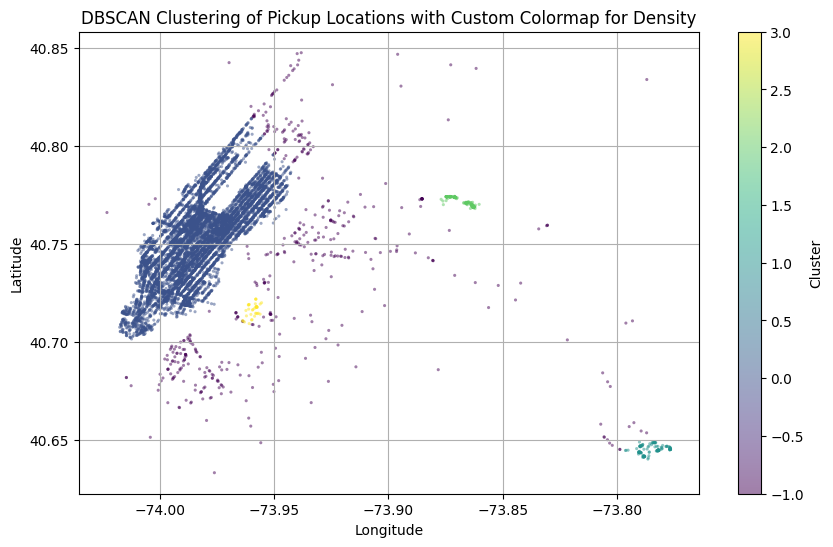

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], c=clusters_pickup, cmap='viridis', s=5, alpha=0.5, edgecolors='none')
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering of Pickup Locations with Custom Colormap for Density')
plt.grid(True)
plt.show()

In [27]:
df['Clustered_Pickup'] = clusters_pickup

In [28]:
clustered_pickup_counts = df['Clustered_Pickup'].value_counts()
print(clustered_pickup_counts)


Clustered_Pickup
 0    8967
-1     438
 2     177
 1     137
 3      38
Name: count, dtype: int64


# Drop off cordinates clustering

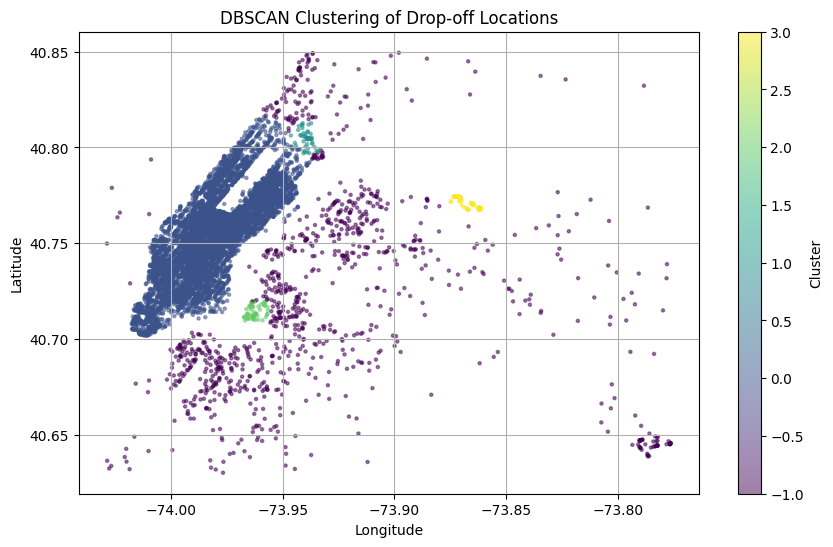

In [29]:
# Extracting coordinates for drop-off clustering
X_dropoff = df[['dropoff_longitude', 'dropoff_latitude']]

# Applying DBSCAN for drop-off locations
epsilon_dropoff = 0.005  # Adjust this value based on the spatial density of drop-off locations
min_samples_dropoff = 30  # Minimum number of samples in a neighborhood for drop-off
dbscan_dropoff = DBSCAN(eps=epsilon_dropoff, min_samples=min_samples_dropoff, metric='euclidean')
clusters_dropoff = dbscan_dropoff.fit_predict(X_dropoff)

# Visualizing clusters for drop-off locations
plt.figure(figsize=(10, 6))
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], c=clusters_dropoff, cmap='viridis', s=5, alpha=0.5)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering of Drop-off Locations')
plt.grid(True)
plt.show()

In [30]:
df['Clustered_Dropoff'] = clusters_dropoff

In [31]:
clustered_dropoff_counts = df['Clustered_Dropoff'].value_counts()
print(clustered_dropoff_counts)


Clustered_Dropoff
 0    8513
-1    1024
 3     115
 1      55
 2      50
Name: count, dtype: int64


Plots for each cluster

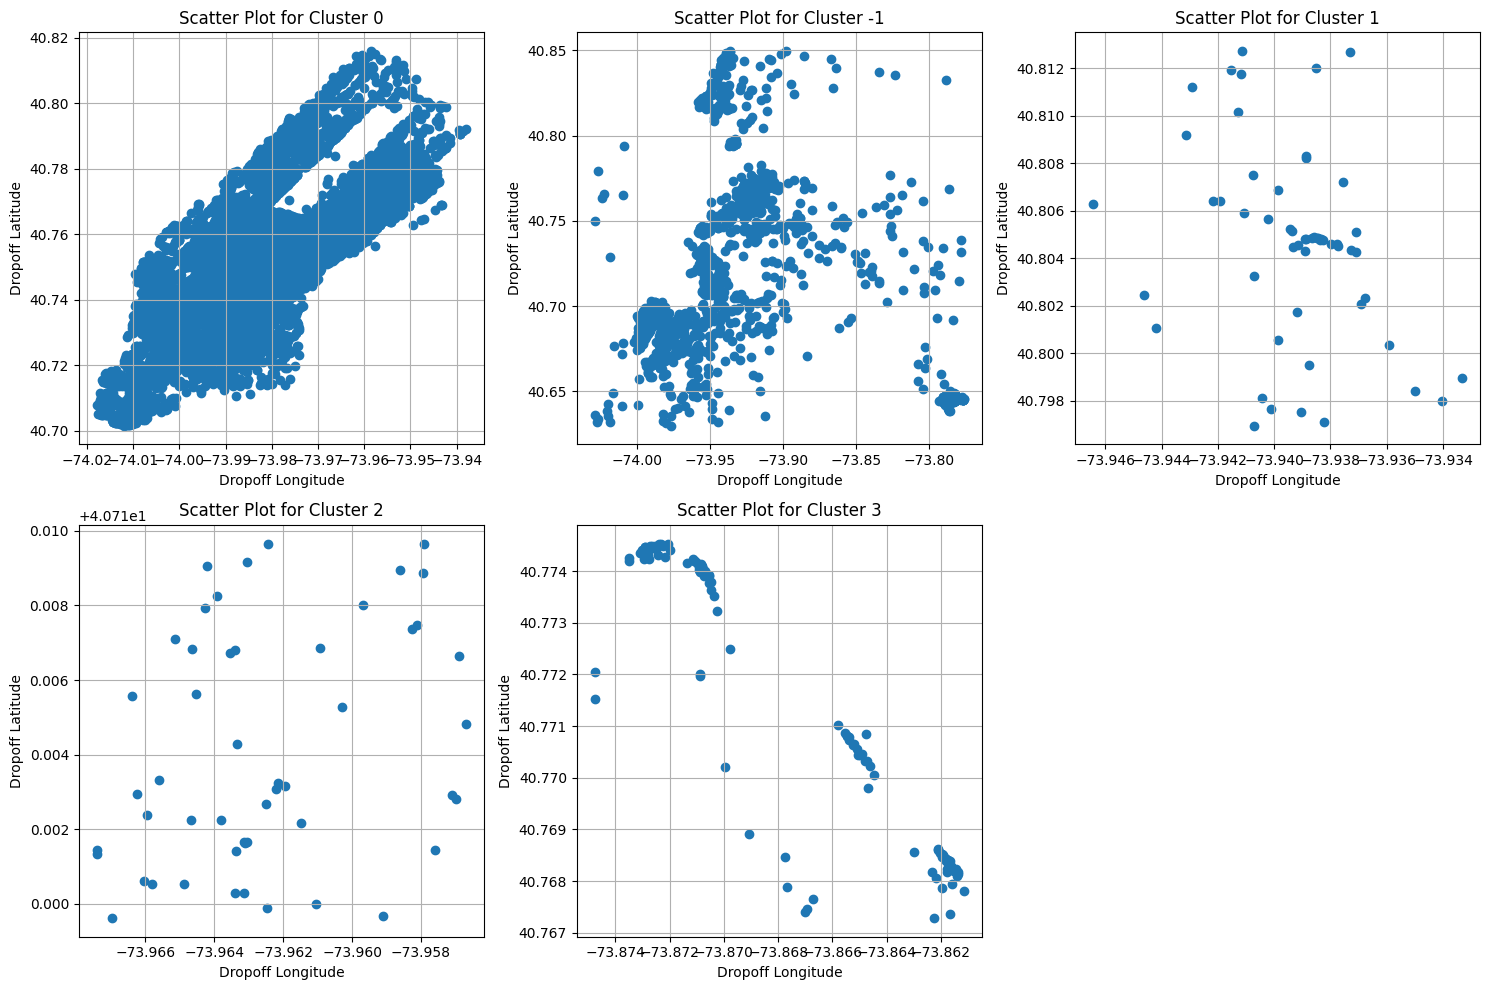

In [32]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns 'dropoff_longitude', 'dropoff_latitude', and 'Clustered_Dropoff'

# Get unique values of 'Clustered_Dropoff'
unique_cluster_values = df['Clustered_Dropoff'].unique()

# Create subplots for each unique 'Clustered_Dropoff' value
num_plots = len(unique_cluster_values)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots - 1) // num_cols + 1  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))  # Adjust figsize as needed

# Flatten the axes if num_rows is greater than 1
if num_rows > 1:
    axes = axes.flatten()

# Plot each unique 'Clustered_Dropoff' value on separate subplots
for i, cluster_value in enumerate(unique_cluster_values):
    filtered_df = df[df['Clustered_Dropoff'] == cluster_value]
    ax = axes[i]
    ax.scatter(filtered_df['dropoff_longitude'], filtered_df['dropoff_latitude'], label=f'Cluster {cluster_value}')
    ax.set_xlabel('Dropoff Longitude')
    ax.set_ylabel('Dropoff Latitude')
    ax.set_title(f'Scatter Plot for Cluster {cluster_value}')
    ax.grid(True)

# Hide empty subplots if the number of plots is less than num_rows * num_cols
for j in range(num_plots, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Connection between pickup and dropoff

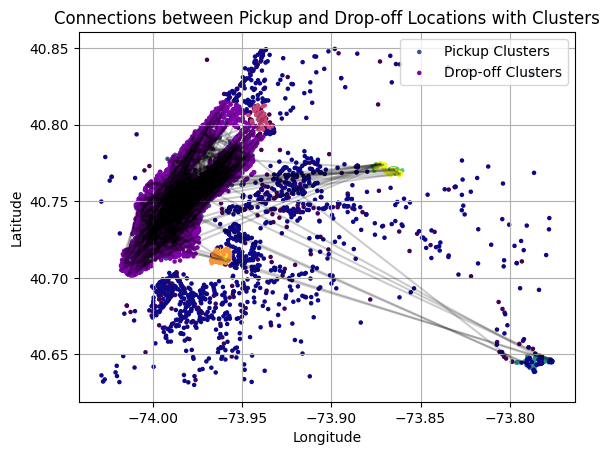

In [33]:
import matplotlib.pyplot as plt

# Plotting connections between pickup and drop-off locations for a sample of rides
sample_size = 1000

for i in range(min(sample_size, len(df))):  # Ensure 'i' doesn't exceed the dataframe size
    pickup_cluster = clusters_pickup[i]
    dropoff_cluster = clusters_dropoff[i]
    
    # Plot a line connecting pickup and drop-off locations for the same ride
    if pickup_cluster != -1 and dropoff_cluster != -1:  # Exclude noise points
        pickup_coords = (df.iloc[i]['pickup_longitude'], df.iloc[i]['pickup_latitude'])
        dropoff_coords = (df.iloc[i]['dropoff_longitude'], df.iloc[i]['dropoff_latitude'])
        
        plt.plot([pickup_coords[0], dropoff_coords[0]], [pickup_coords[1], dropoff_coords[1]], 'k-', alpha=0.2)

# Plotting clusters for pickup and drop-off locations
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], c=clusters_pickup, cmap='viridis', s=5, label='Pickup Clusters')
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], c=clusters_dropoff, cmap='plasma', s=5, label='Drop-off Clusters')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Connections between Pickup and Drop-off Locations with Clusters')
plt.legend()
plt.grid(True)
plt.show()

# Clustering pickup locations with day of week

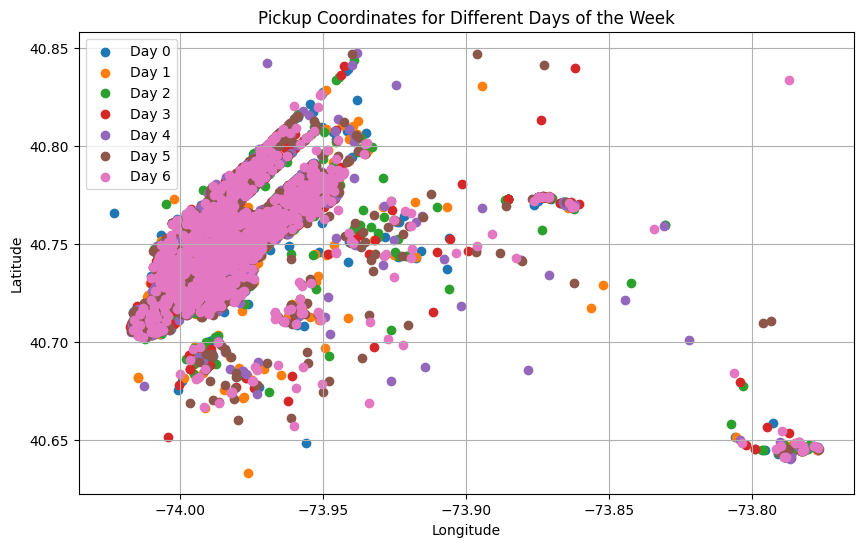

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for day in range(7):  # Iterate through each day of the week
    pickup_coords = df[df['day_of_week'] == day][['pickup_longitude', 'pickup_latitude']]
    plt.scatter(pickup_coords['pickup_longitude'], pickup_coords['pickup_latitude'], label=f'Day {day}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup Coordinates for Different Days of the Week')
plt.legend()
plt.grid(True)
plt.show()

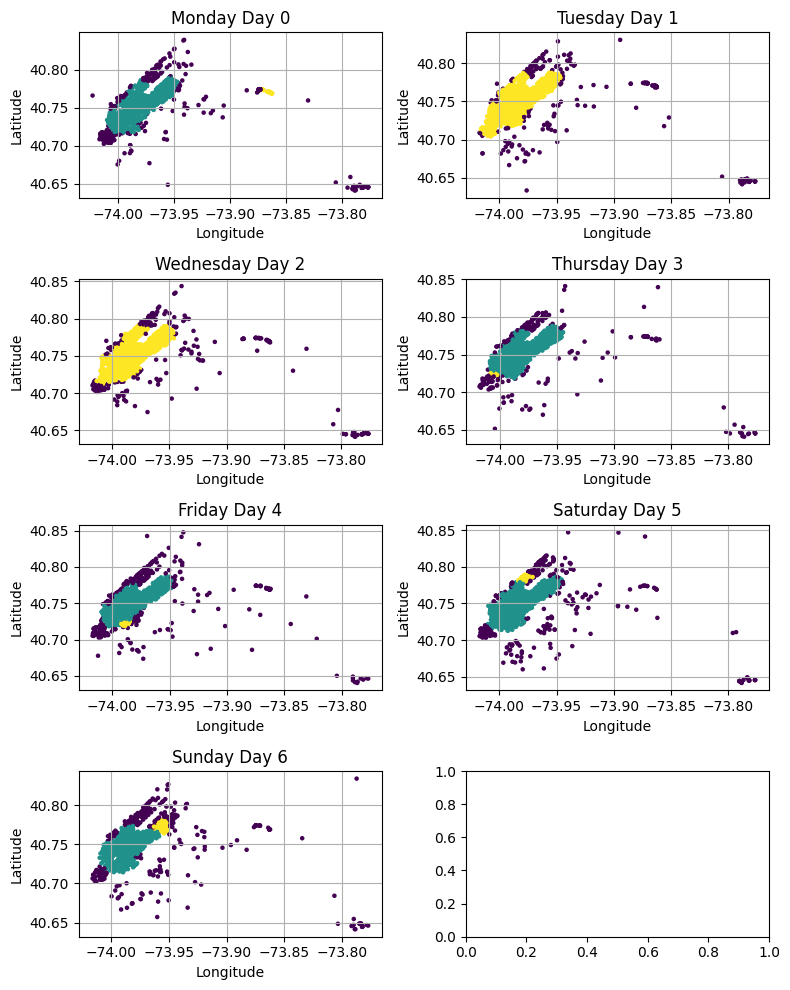

In [35]:
from sklearn.cluster import DBSCAN
import calendar

# Assuming 'day_of_week' is a column representing the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
# Assuming 'pickup_longitude' and 'pickup_latitude' are columns representing coordinates

# Define a function to perform clustering for a specific day
def cluster_and_plot(day, ax):
    pickup_coords = df[df['day_of_week'] == day][['pickup_longitude', 'pickup_latitude']]
    
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=0.005, min_samples=30, metric='euclidean')
    clusters = dbscan.fit_predict(pickup_coords)
    
    # Plot clustered pickup coordinates for the day
    ax.scatter(pickup_coords['pickup_longitude'], pickup_coords['pickup_latitude'], c=clusters, cmap='viridis', s=5)
    ax.set_title(f'{calendar.day_name[day]} Day {day}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)

# Create subplots for each day in a 2x4 grid
fig, axs = plt.subplots(4, 2, figsize=(8, 10))  # 2 rows, 4 columns - Adjust figsize as needed

# Perform clustering and plot for each day
for day in range(7):
    row = day // 2  # Calculate row index
    col = day % 2   # Calculate column index
    cluster_and_plot(day, axs[row, col])

plt.tight_layout()
plt.show()



# Clustering Drop off locations on day of week

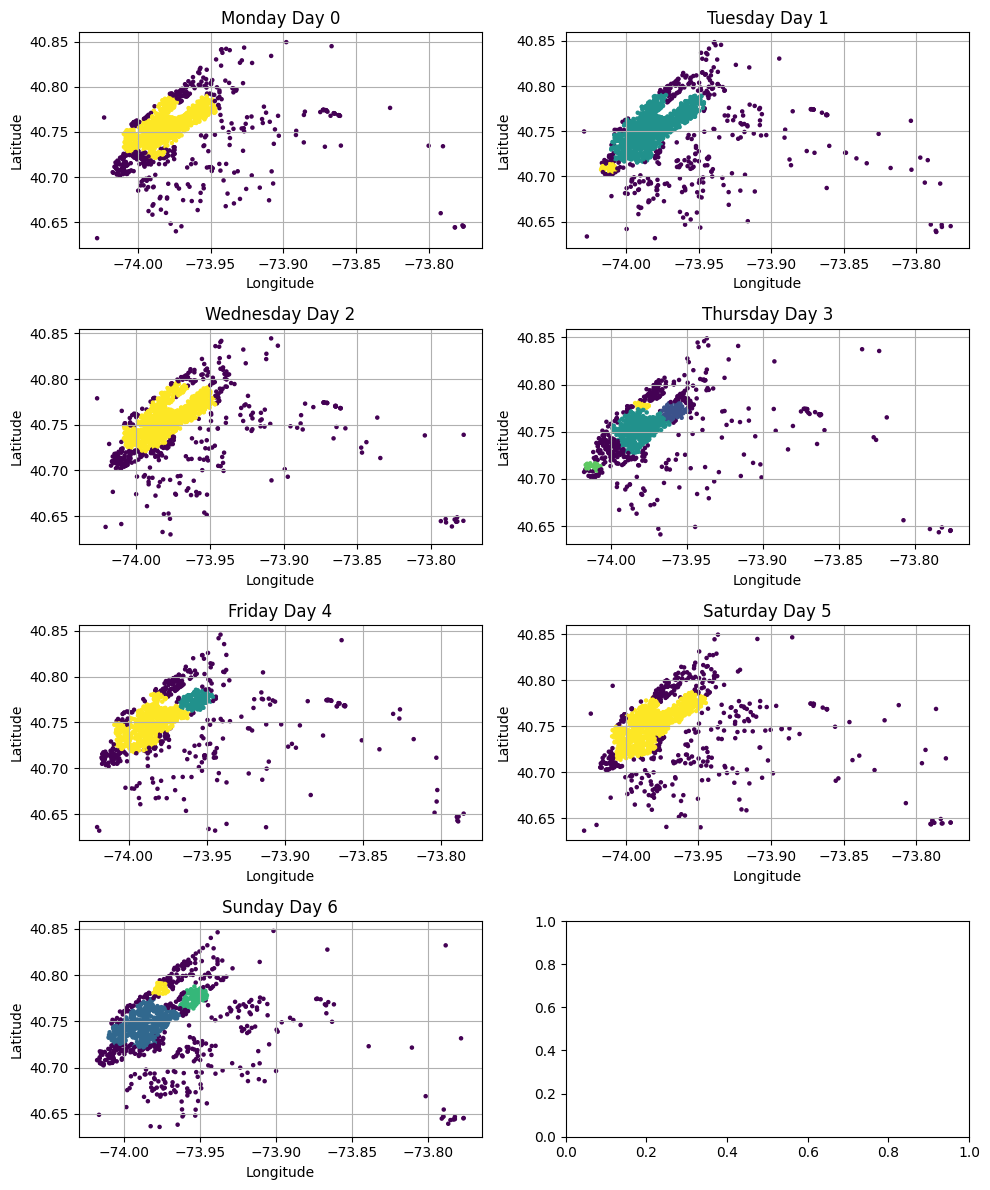

In [36]:
# Define a function to perform clustering for dropoff coordinates for a specific day
def cluster_and_plot_dropoff(day, ax):
    dropoff_coords = df[df['day_of_week'] == day][['dropoff_longitude', 'dropoff_latitude']]
    
    # Perform DBSCAN clustering for dropoff coordinates
    dbscan = DBSCAN(eps=0.005, min_samples=30, metric='euclidean')
    clusters = dbscan.fit_predict(dropoff_coords)
    
    # Plot clustered dropoff coordinates for the day
    ax.scatter(dropoff_coords['dropoff_longitude'], dropoff_coords['dropoff_latitude'], c=clusters, cmap='viridis', s=5)
    ax.set_title(f'{calendar.day_name[day]} Day {day}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)

# Create subplots for each day in a 2x4 grid
fig, axs = plt.subplots(4, 2, figsize=(10, 12))  # 2 rows, 4 columns - Adjust figsize as needed

# Perform clustering and plot for each day based on dropoff coordinates
for day in range(7):
    row = day // 2  # Calculate row index
    col = day % 2   # Calculate column index
    cluster_and_plot_dropoff(day, axs[row, col])

plt.tight_layout()
plt.show()



# Clustering pickup locations on each month

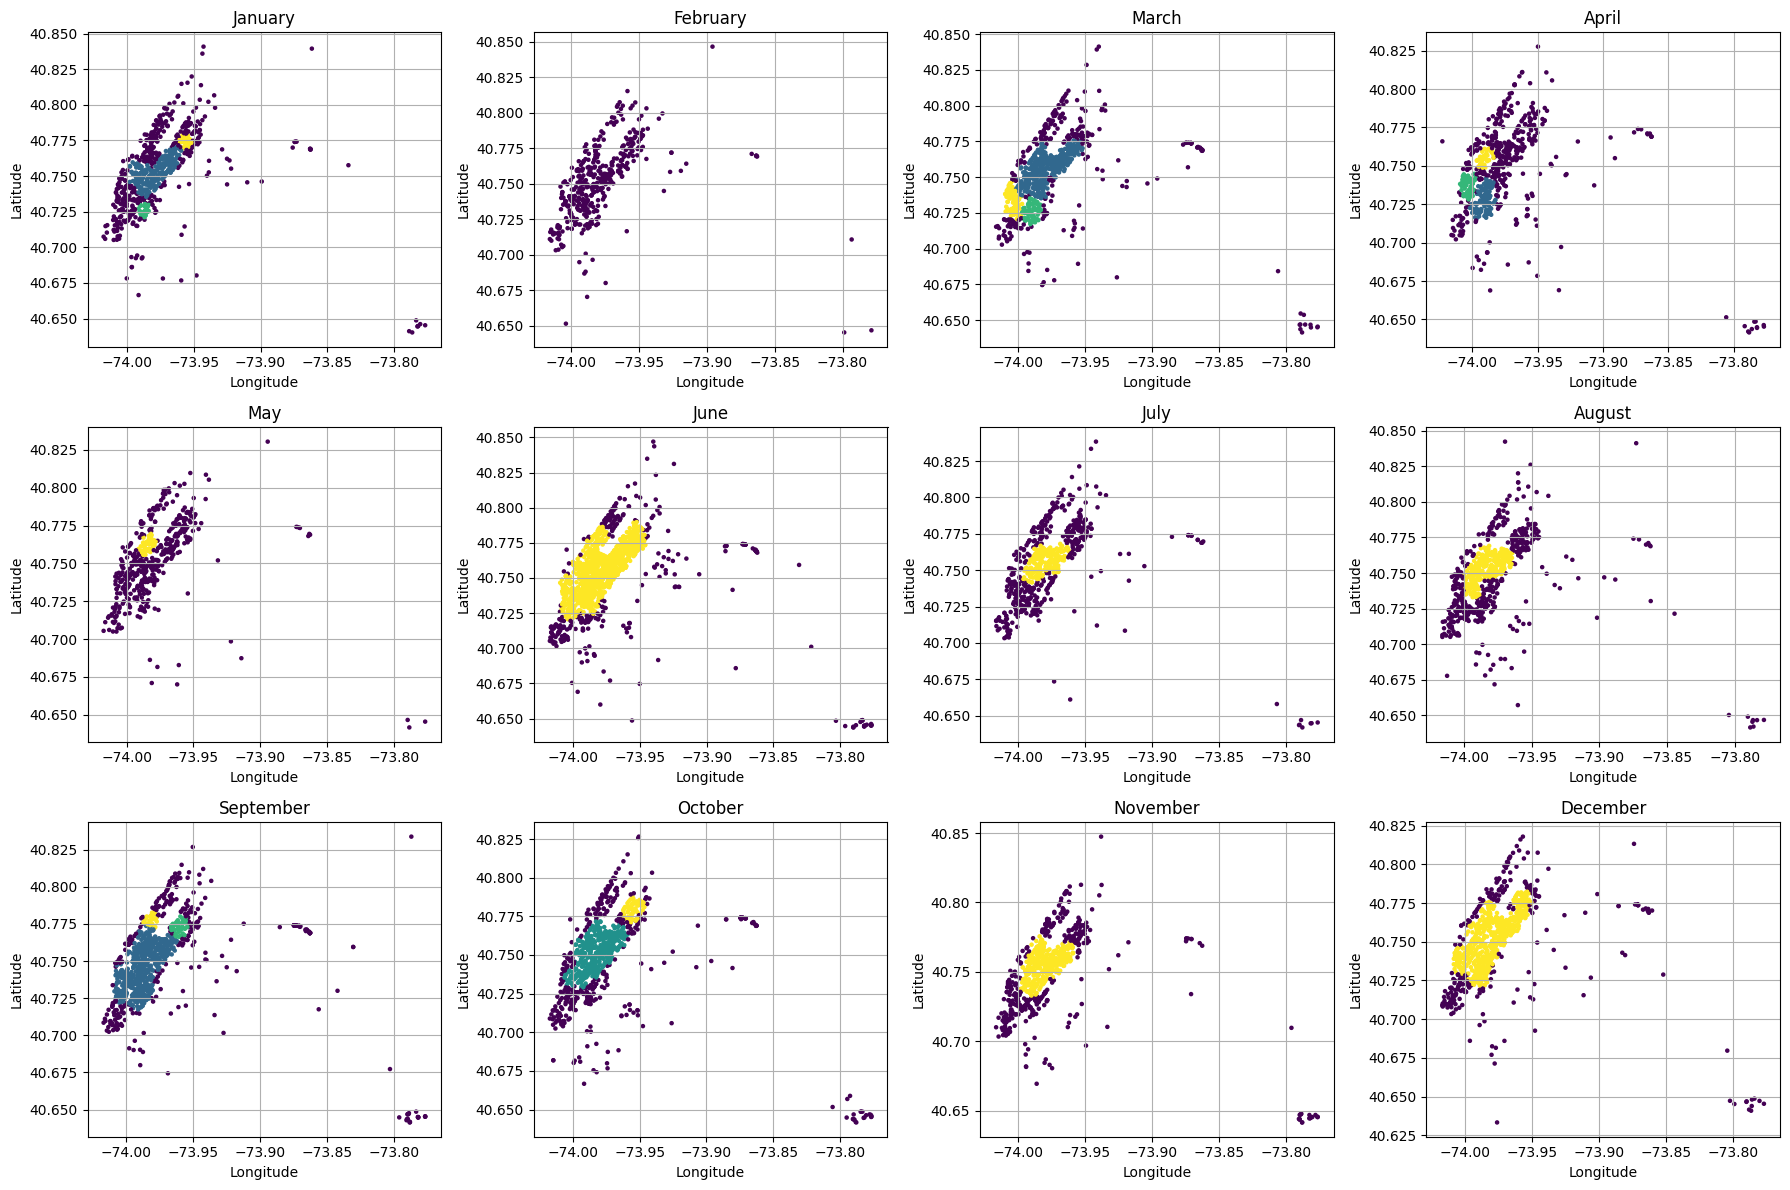

In [37]:
from sklearn.cluster import DBSCAN
import calendar

# Assuming 'month' is a column representing the month number (1=January, 2=February, ..., 12=December)
# Assuming 'pickup_longitude' and 'pickup_latitude' are columns representing coordinates

# Define a function to perform clustering for a specific month
def cluster_and_plot_month(month, ax):
    pickup_coords = df[df['month'] == month][['pickup_longitude', 'pickup_latitude']]
    
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=0.005, min_samples=30, metric='euclidean')
    clusters = dbscan.fit_predict(pickup_coords)
    
    # Plot clustered pickup coordinates for the month
    ax.scatter(pickup_coords['pickup_longitude'], pickup_coords['pickup_latitude'], c=clusters, cmap='viridis', s=5)
    ax.set_title(calendar.month_name[month])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)

# Create subplots for each month
fig, axs = plt.subplots(3, 4, figsize=(18, 12))  # 3 rows, 4 columns for 12 months

# Perform clustering and plot for each month
for month in range(1, 13):
    cluster_and_plot_month(month, axs[(month - 1) // 4, (month - 1) % 4])

plt.tight_layout()
plt.show()



# Clustering dropoff locations on each month

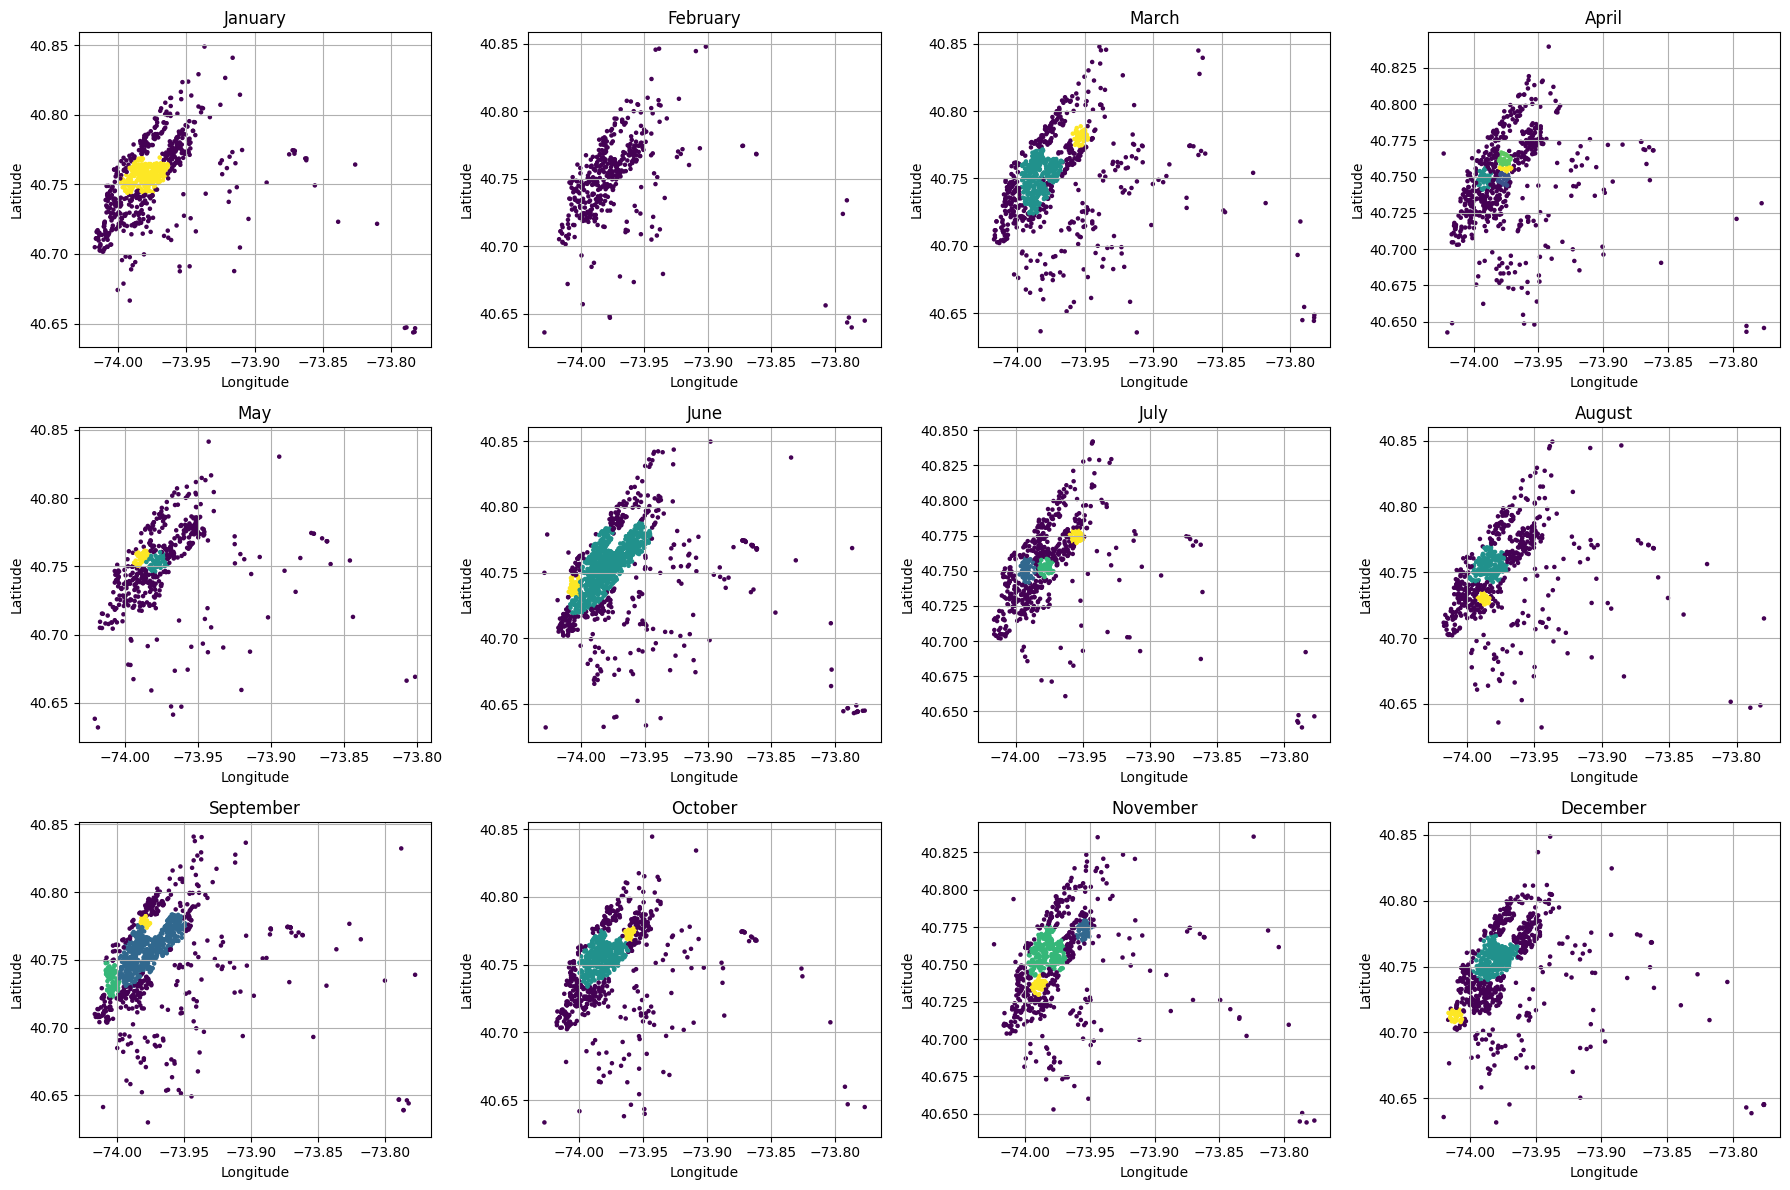

In [38]:
# Define a function to perform clustering for a specific month based on dropoff coordinates
def cluster_and_plot_month_dropoff(month, ax):
    dropoff_coords = df[df['month'] == month][['dropoff_longitude', 'dropoff_latitude']]
    
    # Perform DBSCAN clustering for dropoff coordinates
    dbscan = DBSCAN(eps=0.005, min_samples=30, metric='euclidean')
    clusters = dbscan.fit_predict(dropoff_coords)
    
    # Plot clustered dropoff coordinates for the month
    ax.scatter(dropoff_coords['dropoff_longitude'], dropoff_coords['dropoff_latitude'], c=clusters, cmap='viridis', s=5)
    ax.set_title(calendar.month_name[month])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)

# Create subplots for each month for dropoff coordinates
fig, axs = plt.subplots(3, 4, figsize=(18, 12))  # 3 rows, 4 columns for 12 months

# Perform clustering and plot for each month based on dropoff coordinates
for month in range(1, 13):
    cluster_and_plot_month_dropoff(month, axs[(month - 1) // 4, (month - 1) % 4])

plt.tight_layout()
plt.show()



# Clustering pikcup locations on passenger count

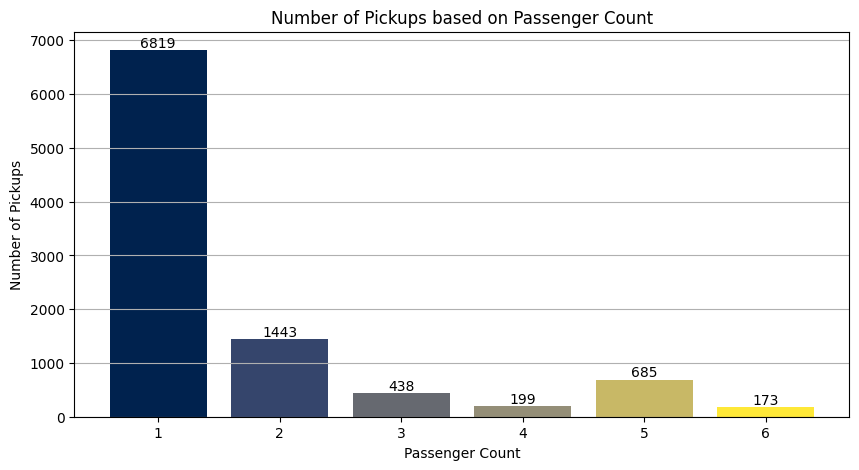

In [39]:
import matplotlib.pyplot as plt

# Count the number of trips for pickups and drop-offs based on passenger count
pickup_counts = df.groupby('passenger_count')['pickup_datetime'].count()

import numpy as np

# Creating a range of colors for the bars
colors = plt.cm.cividis(np.linspace(0, 1, len(pickup_counts)))

plt.figure(figsize=(10, 5))
bars = plt.bar(pickup_counts.index, pickup_counts.values, color=colors)

# Adding labels for each bar
for bar, count in zip(bars, pickup_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(count), ha='center', va='bottom')

plt.xlabel('Passenger Count')
plt.ylabel('Number of Pickups')
plt.title('Number of Pickups based on Passenger Count')
plt.xticks(pickup_counts.index)
plt.grid(axis='y')
plt.show()




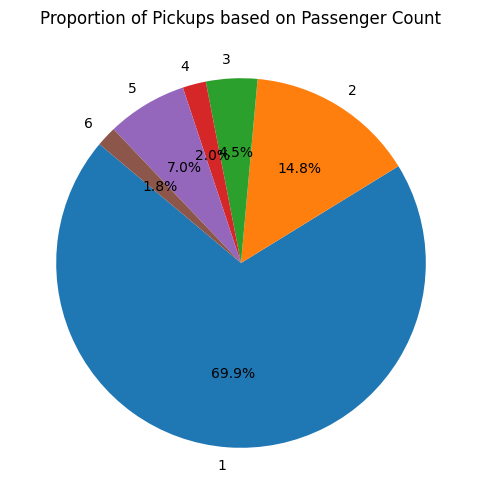

In [40]:
plt.figure(figsize=(6, 6))
plt.pie(pickup_counts.values, labels=pickup_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Pickups based on Passenger Count')
plt.show()


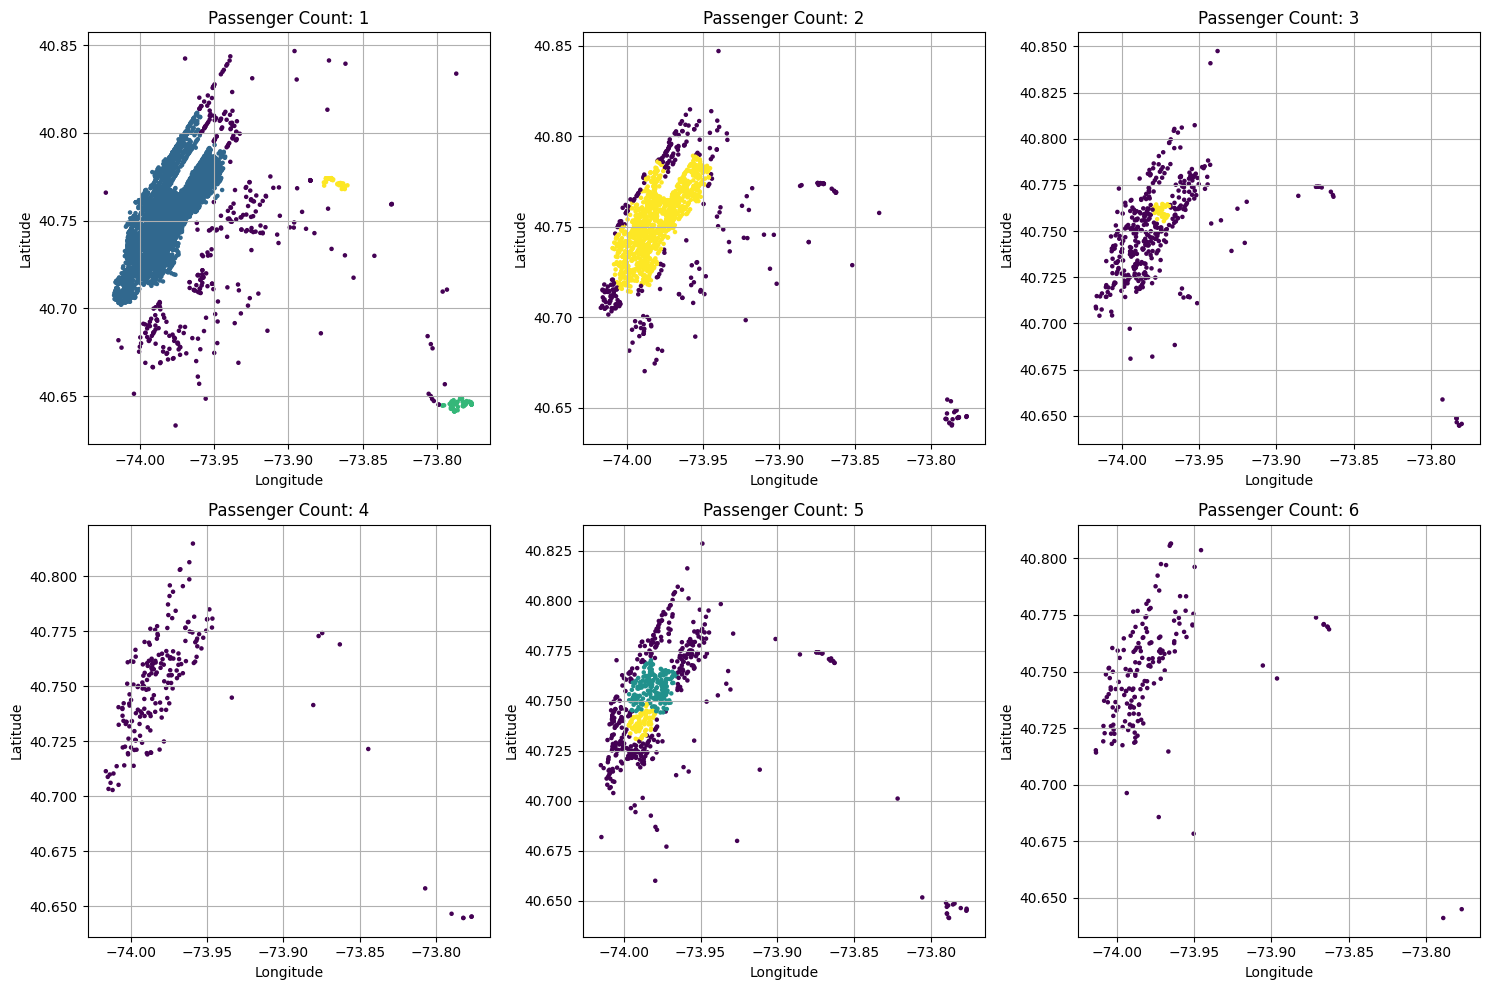

In [41]:
# Define a function to perform clustering for pickup coordinates based on passenger count
def cluster_and_plot_passenger_count(passenger_count, ax):
    pickup_coords = df[df['passenger_count'] == passenger_count][['pickup_longitude', 'pickup_latitude']]
    
    # Perform DBSCAN clustering for pickup coordinates based on passenger count
    dbscan = DBSCAN(eps=0.005, min_samples=30, metric='euclidean')
    clusters = dbscan.fit_predict(pickup_coords)
    
    # Plot clustered pickup coordinates based on passenger count
    ax.scatter(pickup_coords['pickup_longitude'], pickup_coords['pickup_latitude'], c=clusters, cmap='viridis', s=5)
    ax.set_title(f'Passenger Count: {passenger_count}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)

# Create subplots for each passenger count in a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns for 6 passenger counts

# Perform clustering and plot for each passenger count based on pickup coordinates
for count in range(1, 7):
    row = (count - 1) // 3  # Calculate row index
    col = (count - 1) % 3   # Calculate column index
    cluster_and_plot_passenger_count(count, axs[row, col])

plt.tight_layout()
plt.show()


# Clustering dropoff locations on passenger count

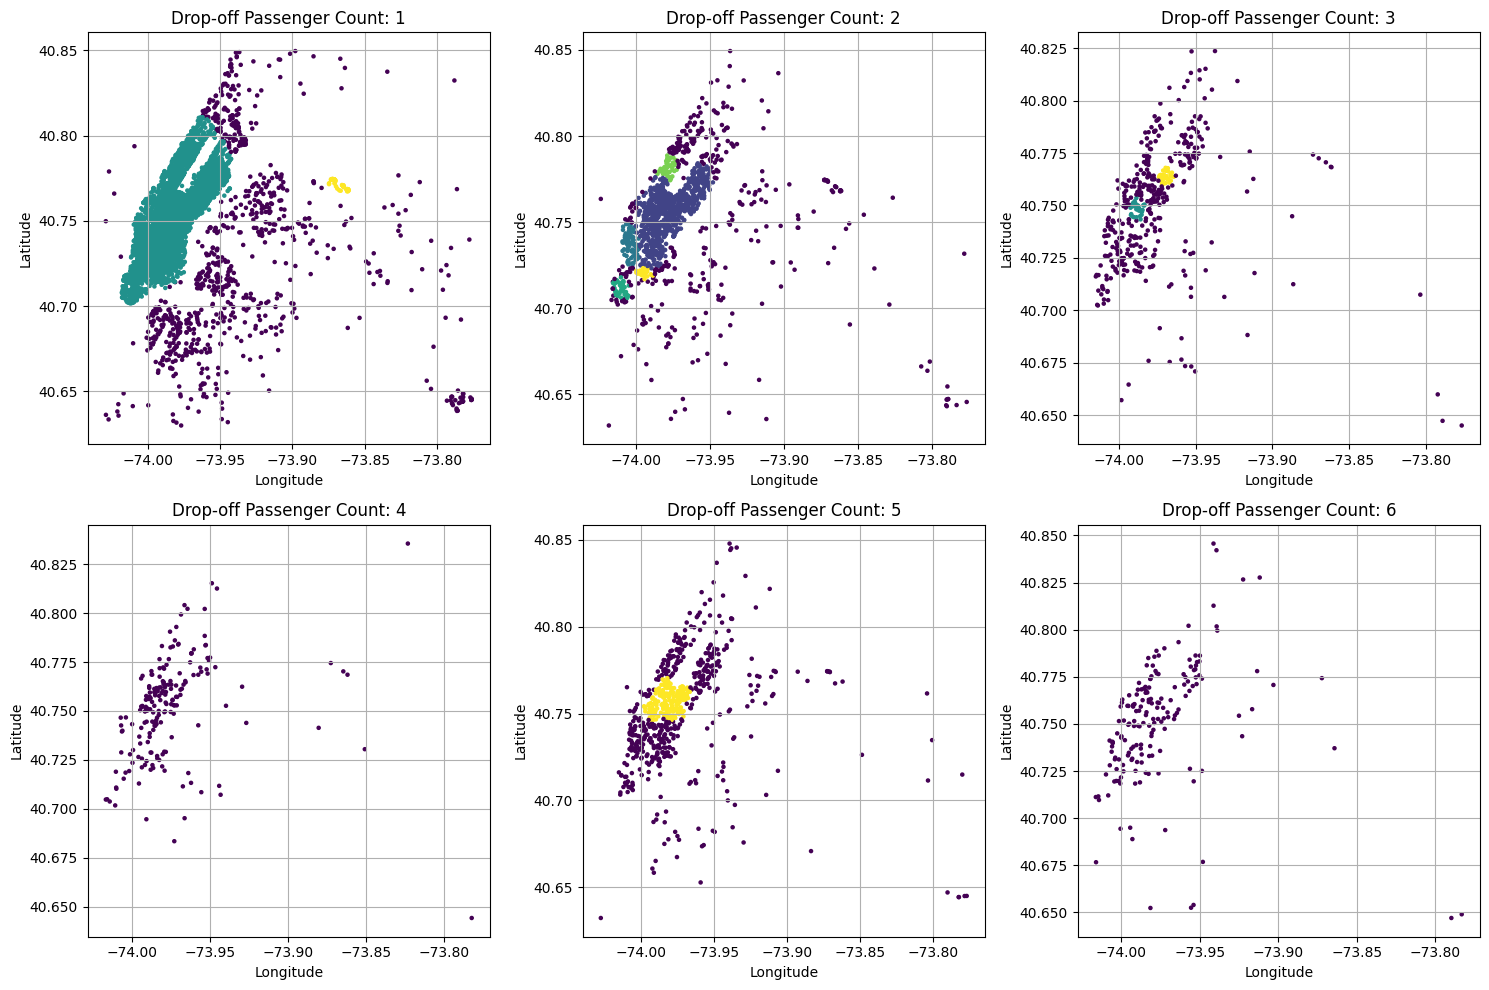

In [42]:
# Define a function to perform clustering for drop-off coordinates based on passenger count
def cluster_and_plot_dropoff_passenger_count(passenger_count, ax):
    dropoff_coords = df[df['passenger_count'] == passenger_count][['dropoff_longitude', 'dropoff_latitude']]
    
    # Perform DBSCAN clustering for drop-off coordinates based on passenger count
    dbscan = DBSCAN(eps=0.005, min_samples=30, metric='euclidean')
    clusters = dbscan.fit_predict(dropoff_coords)
    
    # Plot clustered drop-off coordinates based on passenger count
    ax.scatter(dropoff_coords['dropoff_longitude'], dropoff_coords['dropoff_latitude'], c=clusters, cmap='viridis', s=5)
    ax.set_title(f'Drop-off Passenger Count: {passenger_count}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)

# Create subplots for each passenger count in a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns for 6 passenger counts

# Perform clustering and plot for each passenger count based on drop-off coordinates
for count in range(1, 7):
    row = (count - 1) // 3  # Calculate row index
    col = (count - 1) % 3   # Calculate column index
    cluster_and_plot_dropoff_passenger_count(count, axs[row, col])

plt.tight_layout()
plt.show()



In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9757 entries, 0 to 9913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   pickup_datetime    9757 non-null   datetime64[ns, UTC]
 1   pickup_longitude   9757 non-null   float64            
 2   pickup_latitude    9757 non-null   float64            
 3   dropoff_longitude  9757 non-null   float64            
 4   dropoff_latitude   9757 non-null   float64            
 5   passenger_count    9757 non-null   int64              
 6   year               9757 non-null   int32              
 7   month              9757 non-null   int32              
 8   day_of_week        9757 non-null   int32              
 9   name_of_week       9757 non-null   object             
 10  hour               9757 non-null   int32              
 11  distance           9757 non-null   float64            
 12  Clustered_Pickup   9757 non-null   int64             

# Clustering pickup locations on each year

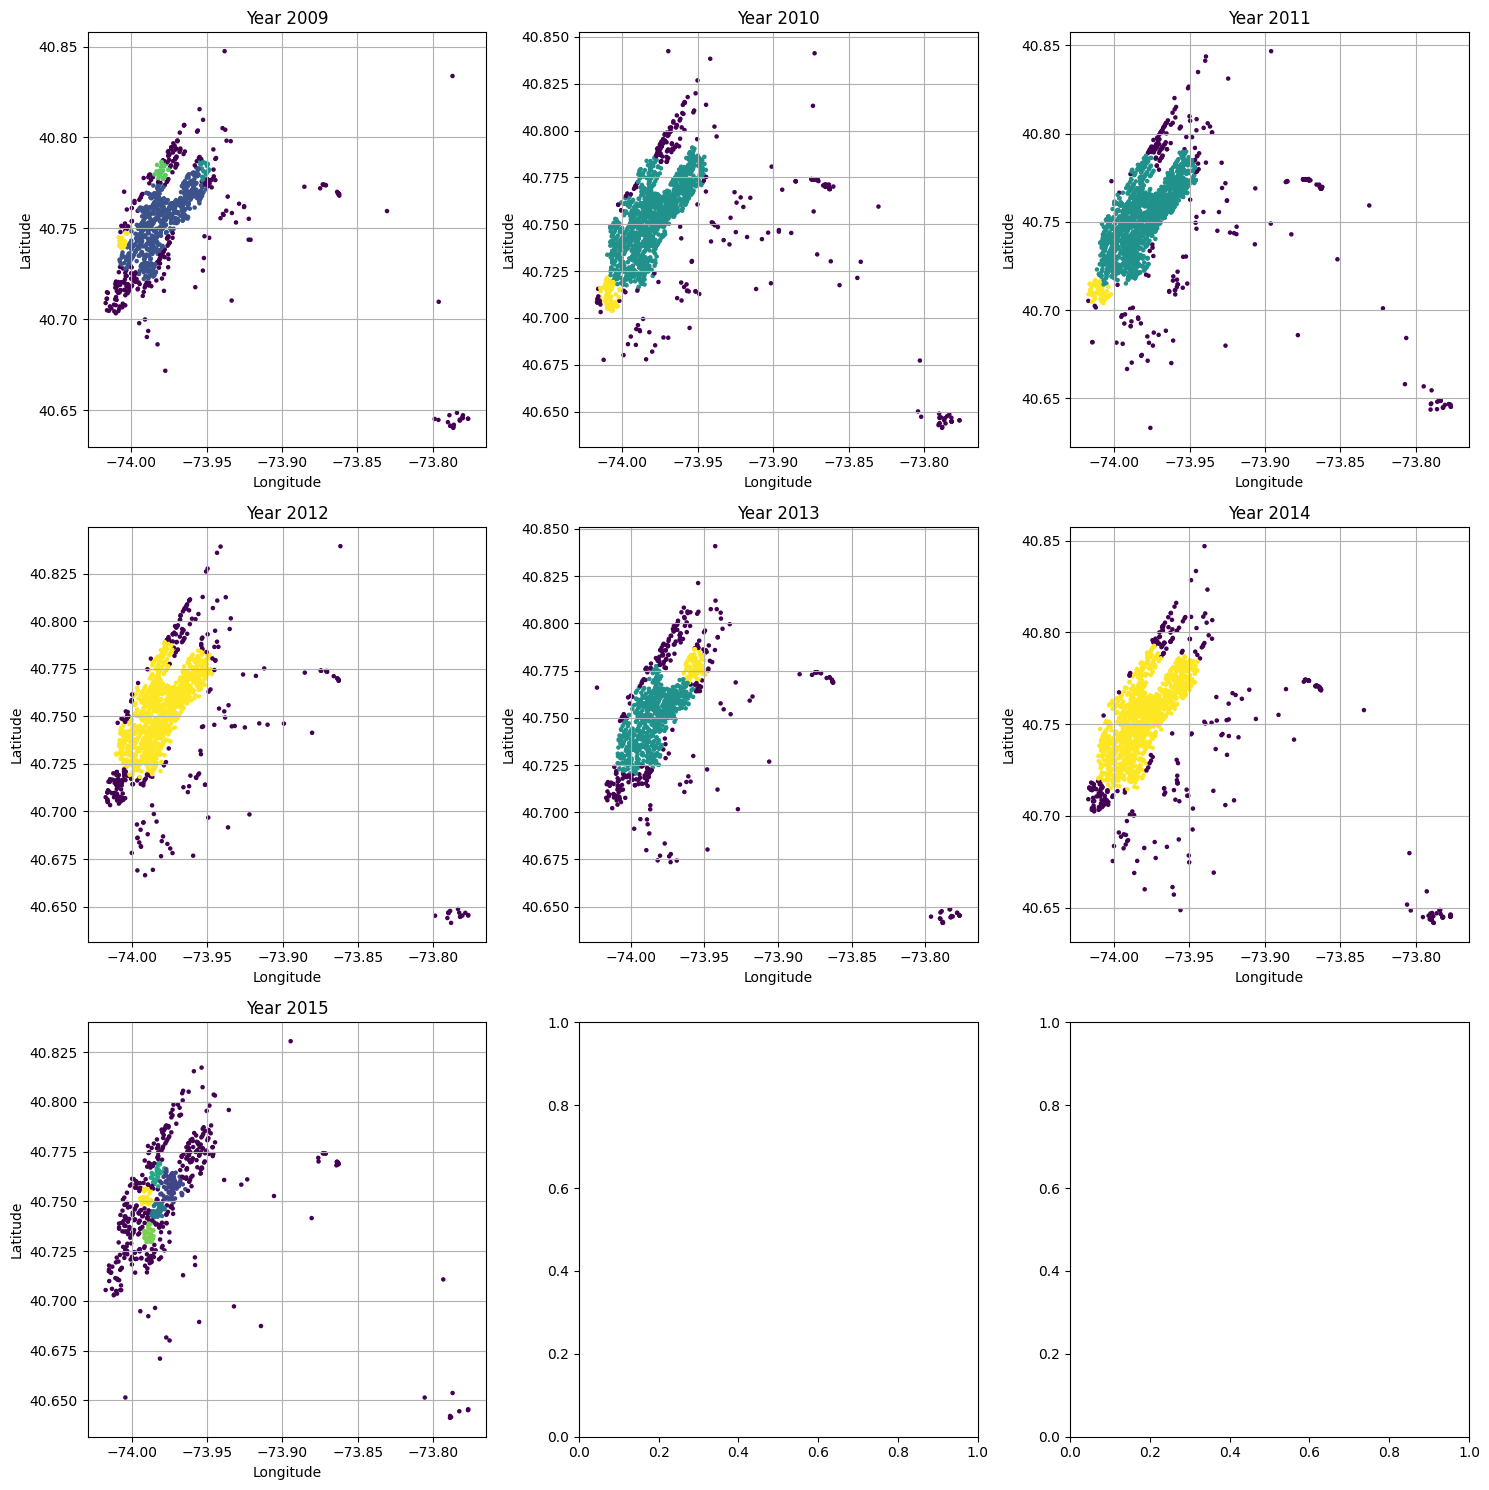

In [44]:
# Define a function to perform clustering for pickup coordinates for a specific year
def cluster_and_plot_pickup_by_year(year, ax):
    pickup_coords = df[df['year'] == year][['pickup_longitude', 'pickup_latitude']]
    
    # Perform DBSCAN clustering for pickup coordinates
    dbscan = DBSCAN(eps=0.005, min_samples=30, metric='euclidean')
    clusters = dbscan.fit_predict(pickup_coords)
    
    # Plot clustered pickup coordinates for the year
    ax.scatter(pickup_coords['pickup_longitude'], pickup_coords['pickup_latitude'], c=clusters, cmap='viridis', s=5)
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)

# Get unique years in the dataset and sort them
unique_years = sorted(df['year'].unique())

# Create subplots for each unique year
num_years = len(unique_years)
num_rows = (num_years // 3) + (num_years % 3 > 0)
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  # Adjust figsize as needed

# Perform clustering and plot for each unique year based on pickup coordinates
for i, year in enumerate(unique_years):
    row = i // 3  # Calculate row index
    col = i % 3   # Calculate column index
    cluster_and_plot_pickup_by_year(year, axs[row, col])

plt.tight_layout()
plt.show()


# Clustering dropoff locations on each year

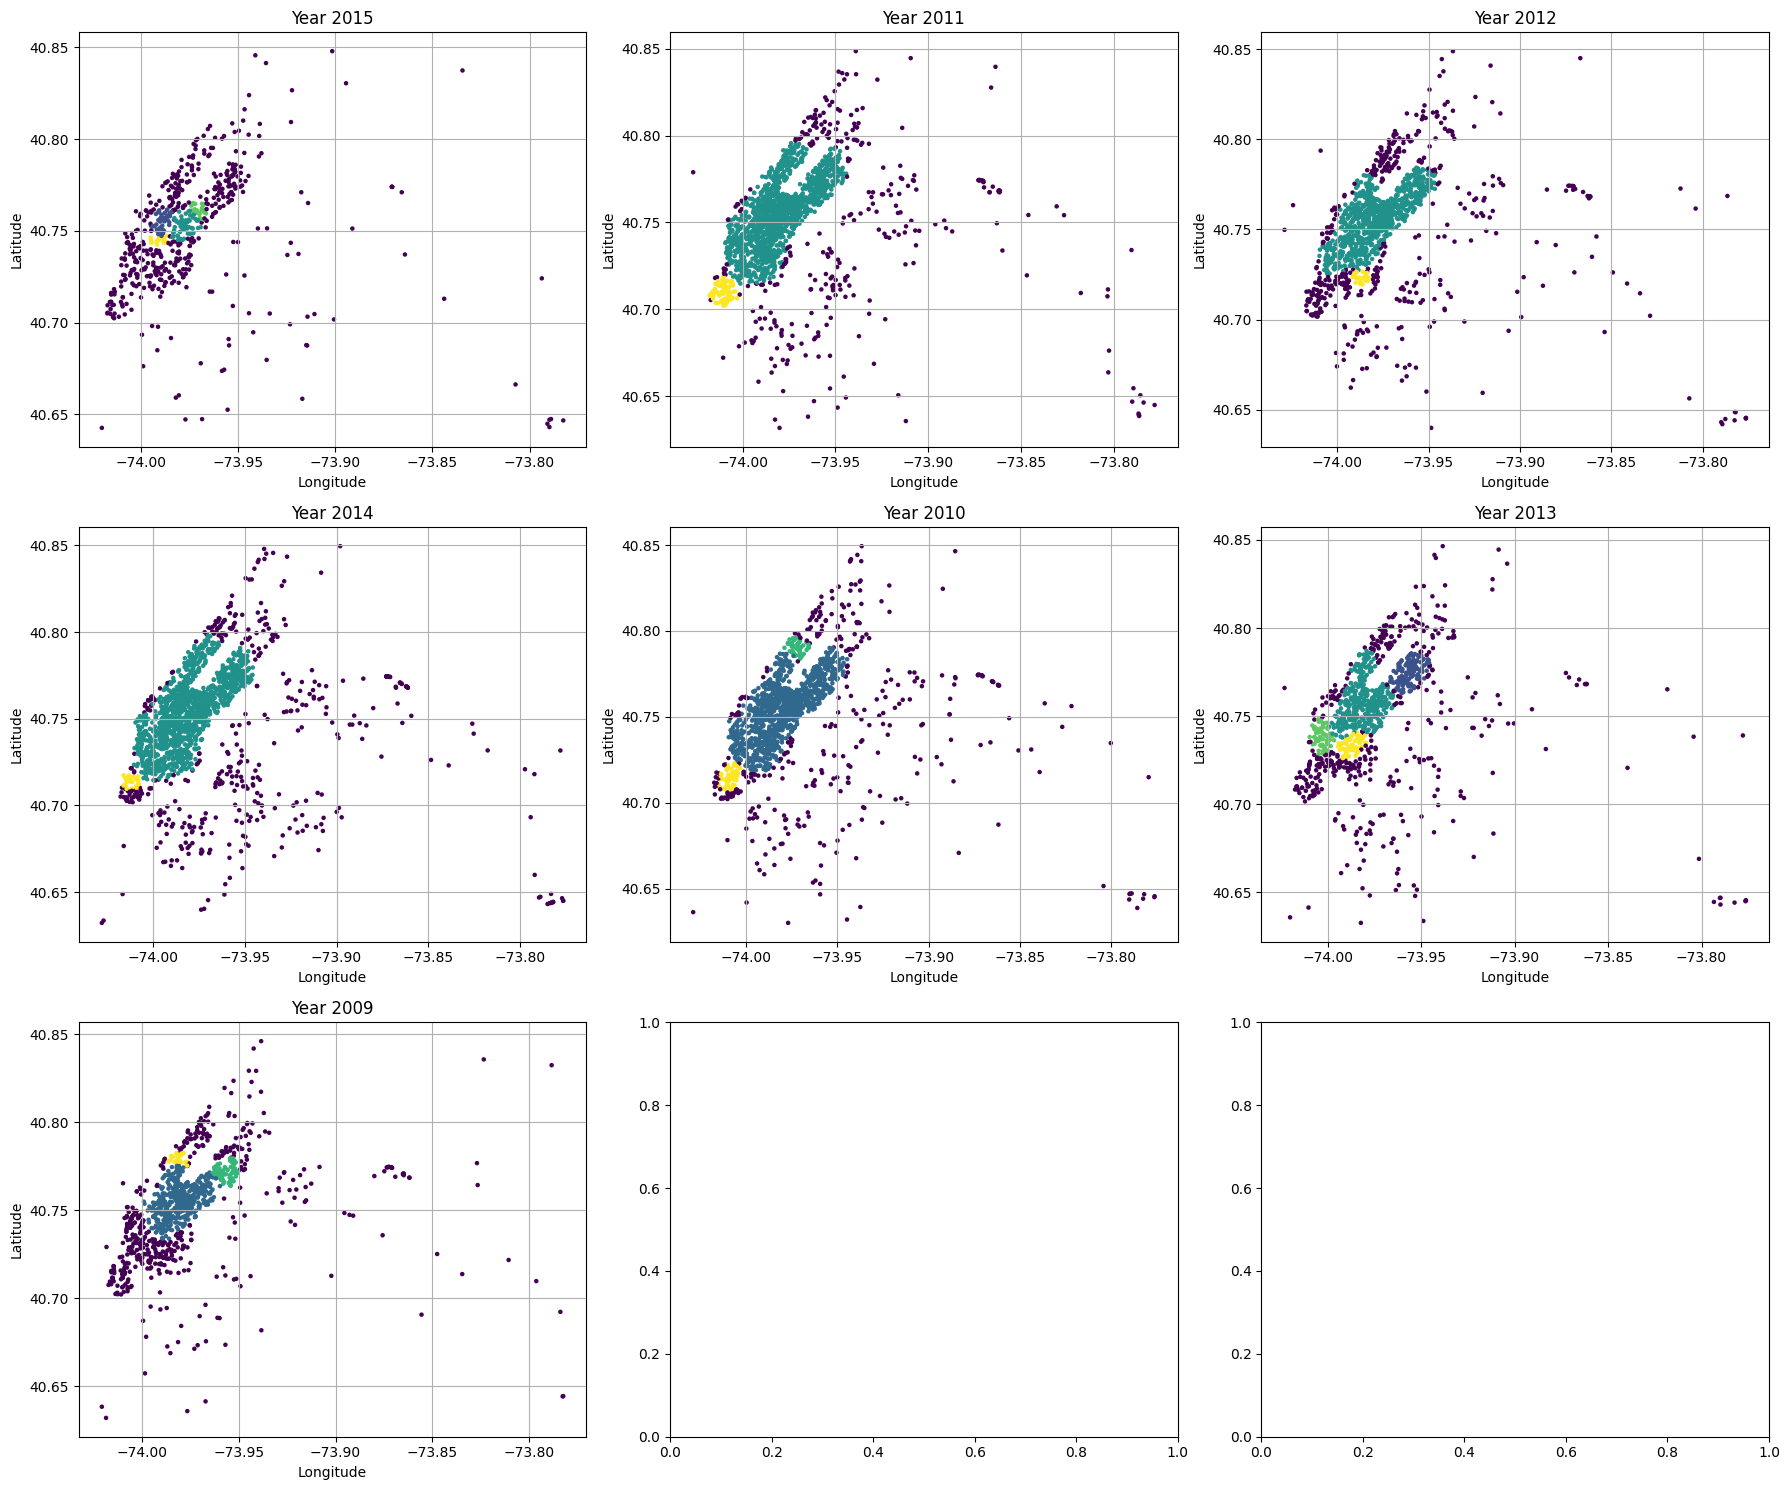

In [45]:
# Define a function to perform clustering for dropoff coordinates for a specific year
def cluster_and_plot_dropoff_by_year(year, ax):
    dropoff_coords = df[df['year'] == year][['dropoff_longitude', 'dropoff_latitude']]
    
    # Perform DBSCAN clustering for dropoff coordinates
    dbscan = DBSCAN(eps=0.005, min_samples=30, metric='euclidean')
    clusters = dbscan.fit_predict(dropoff_coords)
    
    # Plot clustered dropoff coordinates for the year
    ax.scatter(dropoff_coords['dropoff_longitude'], dropoff_coords['dropoff_latitude'], c=clusters, cmap='viridis', s=5)
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)

# Get unique years in the dataset
unique_years = df['year'].unique()

# Create subplots for each unique year
num_years = len(unique_years)
num_rows = (num_years // 3) + (num_years % 3 > 0)
fig, axs = plt.subplots(num_rows, 3, figsize=(18, num_rows * 5))  # Adjust figsize as needed

# Perform clustering and plot for each unique year based on dropoff coordinates
for i, year in enumerate(unique_years):
    row = i // 3  # Calculate row index
    col = i % 3   # Calculate column index
    cluster_and_plot_dropoff_by_year(year, axs[row, col])

plt.tight_layout()
plt.show()


Vary of hours in days of week

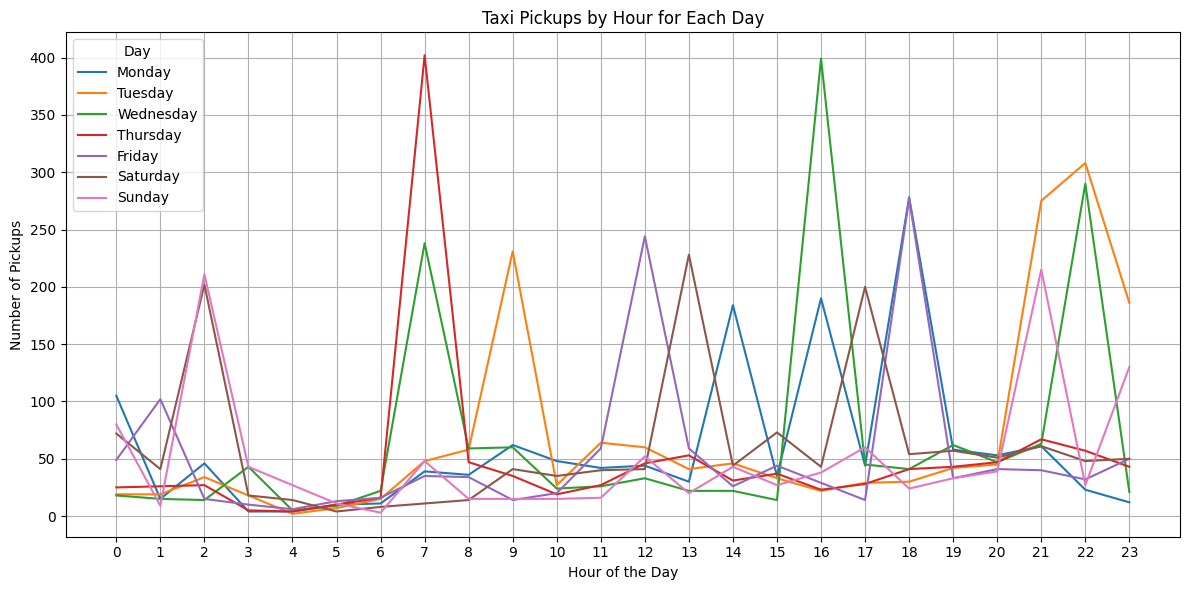

In [46]:
import calendar

# Group by day and hour, and count the number of pickups
pickup_counts = df.groupby(['day_of_week', 'hour']).size().unstack()

# Plotting all days in a single diagram
plt.figure(figsize=(12, 6))
for day in range(7):
    pickup_counts.loc[day].plot(label=calendar.day_name[day])

plt.title('Taxi Pickups by Hour for Each Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))
plt.legend(title='Day')
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
df.describe()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count       9757.000000      9757.000000        9757.000000       9757.000000   
mean         -73.975786        40.750606         -73.974478         40.751159   
std            0.033796         0.026361           0.030745          0.028872   
min          -74.023050        40.633303         -74.028842         40.630052   
25%          -73.992554        40.736218         -73.991247         40.735578   
50%          -73.982366        40.753036         -73.980180         40.754015   
75%          -73.968212        40.766977         -73.964849         40.768510   
max          -73.776585        40.847477         -73.776249         40.849527   

       passenger_count         year        month  day_of_week         hour  \
count      9757.000000  9757.000000  9757.000000  9757.000000  9757.000000   
mean          1.668341  2011.818079     6.855591     2.851696    13.477606   
std           1.277135     1.802352     3.354141     1.994005     6.847818   
min           1.000000  2009.000000     1.000000     0.000000     0.000000   
25%           1.000000  2010.000000     4.000000     1.000000     8.000000   
50%           1.000000  2012.000000     7.000000     3.000000    15.000000   
75%           2.000000  2014.000000    10.000000     5.000000    19.000000   
max           6.000000  2015.000000    12.000000     6.000000    23.000000   

          distance  Clustered_Pickup  Clustered_Dropoff  
count  9757.000000       9757.000000        9757.000000  
mean      3.281119          0.017116          -0.053705  
std       3.374029          0.407764           0.484048  
min       0.000000         -1.000000          -1.000000  
25%       1.292545          0.000000           0.000000  
50%       2.197590          0.000000           0.000000  
75%       3.952957          0.000000           0.000000  
max      25.565980          3.000000           3.000000

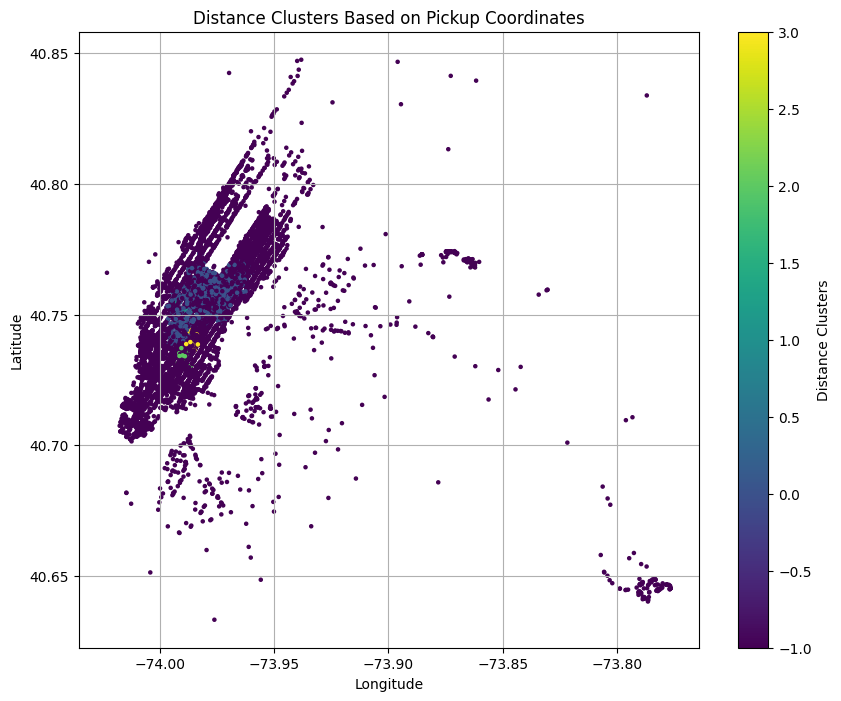

In [48]:
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming 'distance' is the column representing distances
# Assuming 'pickup_longitude' and 'pickup_latitude' are columns representing coordinates

# Combine pickup coordinates and distances
pickup_coords = df[['pickup_longitude', 'pickup_latitude']].values
distances = df['distance'].values.reshape(-1, 1)

# Scale the distances for clustering
scaled_distances = (distances - np.min(distances)) / (np.max(distances) - np.min(distances))

# Combine pickup coordinates and scaled distances
data = np.concatenate((pickup_coords, scaled_distances), axis=1)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.005, min_samples=30, metric='euclidean')
clusters = dbscan.fit_predict(data)

df['distance_clustered']= clusters

# Plot clustered pickup coordinates colored by distance clusters
plt.figure(figsize=(10, 8))
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], c=clusters, cmap='viridis', s=5)
plt.colorbar(label='Distance Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distance Clusters Based on Pickup Coordinates')
plt.grid(True)
plt.show()


In [49]:
# Group the DataFrame by the distance clusters and calculate statistics
cluster_stats = df.groupby('distance_clustered')['distance'].describe()

# Display the statistics for each cluster
print(cluster_stats)


                     count      mean       std       min       25%       50%  \
distance_clustered                                                             
-1                  8348.0  3.603345  3.544593  0.000000  1.469241  2.552537   
 0                  1316.0  1.336385  0.334161  0.696779  1.064163  1.293616   
 1                    30.0  2.093190  0.067355  1.964246  2.049428  2.098987   
 2                    31.0  1.304474  0.056215  1.185608  1.264721  1.317323   
 3                    32.0  2.226235  0.052516  2.134393  2.188202  2.217950   

                         75%        max  
distance_clustered                       
-1                  4.391811  25.565980  
 0                  1.581398   2.181149  
 1                  2.139333   2.198010  
 2                  1.354410   1.379954  
 3                  2.253894   2.323753  


In [50]:
num_clusters = len(np.unique(clusters[clusters != -1]))
print(num_clusters)

4


In [51]:
df.to_csv('clustered_data.csv', index=False)